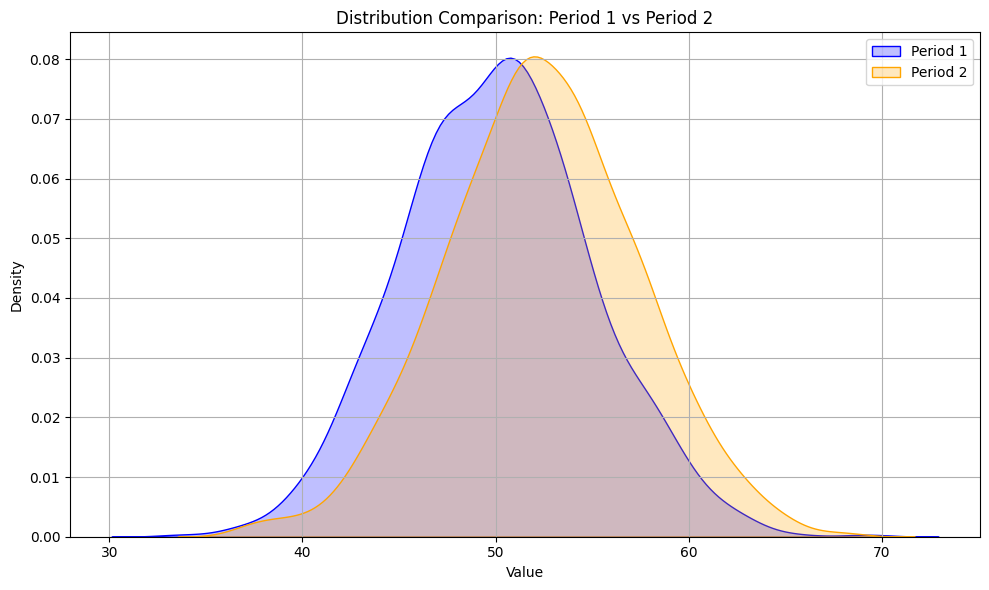

KS Statistic: 0.1970
P-Value: 0.0000
✅ Significant data drift detected between periods.


In [2]:
# Question: Detecting Data Drift
# Description: Identify potential data drift between two time periods for a numeric attribute.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Simulate numeric data for two time periods
np.random.seed(42)
data_period1 = np.random.normal(loc=50, scale=5, size=1000)   # Period 1
data_period2 = np.random.normal(loc=52, scale=5, size=1000)   # Period 2 (slightly drifted)

# Combine into a DataFrame
df = pd.DataFrame({
    'value': np.concatenate([data_period1, data_period2]),
    'period': ['period1']*1000 + ['period2']*1000
})

# Separate the two periods
data1 = df[df['period'] == 'period1']['value']
data2 = df[df['period'] == 'period2']['value']

# --- Visual Distribution Comparison ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data1, label='Period 1', fill=True, color='blue')
sns.kdeplot(data2, label='Period 2', fill=True, color='orange')
plt.title('Distribution Comparison: Period 1 vs Period 2')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Statistical Drift Test (Kolmogorov-Smirnov Test) ---
statistic, p_value = ks_2samp(data1, data2)
print(f"KS Statistic: {statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# --- Interpretation ---
alpha = 0.05
if p_value < alpha:
    print("✅ Significant data drift detected between periods.")
else:
    print("✅ No significant data drift detected.")



